#**IPL player Performance -**

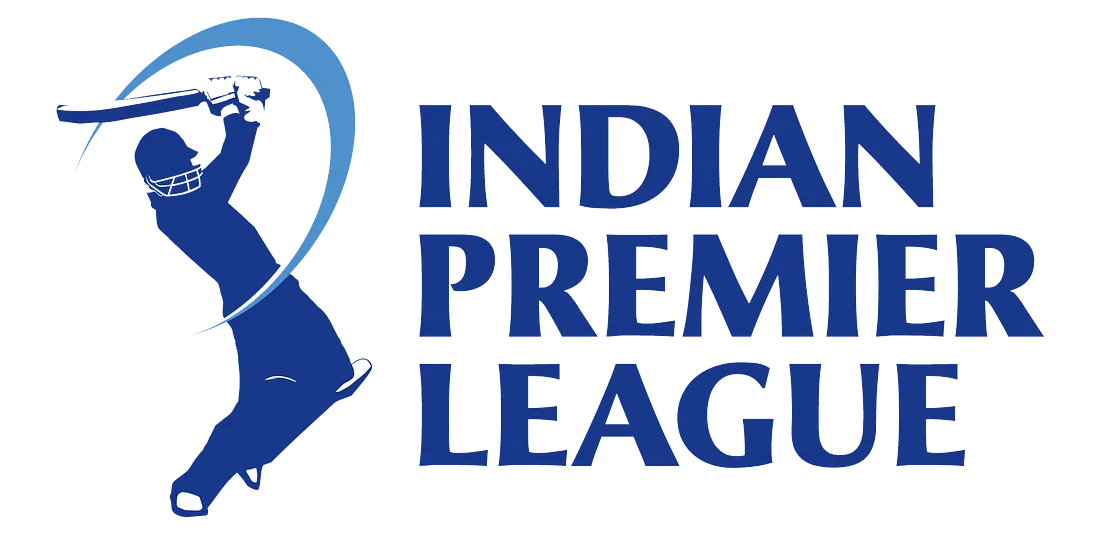

#**EXPLORATORY DATA ANALYSIS**

##IMPORTING LIBRARIES

In [1]:
%pip install squarify

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import Image
import squarify
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings("ignore")

##LOADING AND CHECKING THE DATASET

In [3]:
from google.colab import files
uploaded = files.upload()  # Opens a file picker

Saving Most Runs - 2020.csv to Most Runs - 2020.csv


In [5]:
import io

for filename in uploaded.keys():
    df_most_runs = pd.read_csv(io.BytesIO(uploaded[filename]))
    print(f"Loaded {filename}")
    print(df_most_runs.head(10))

Loaded Most Runs - 2020.csv
   POS            Player  Mat  Inns  NO  Runs    HS    Avg   BF      SR  100  \
0    1          KL Rahul   14    14   2   670  132*  55.83  518  129.34    1   
1    2    Shikhar Dhawan   17    17   3   618  106*  44.14  427  144.73    2   
2    3      David Warner   16    16   2   548   85*  39.14  407  134.64    0   
3    4      Shreyas Iyer   17    17   2   519   88*  34.60  421  123.27    0   
4    5      Ishan Kishan   14    13   4   516    99  57.33  354  145.76    0   
5    6   Quinton de Kock   16    16   2   503   78*  35.92  358  140.50    0   
6    7  Suryakumar Yadav   16    15   3   480   79*  40.00  331  145.01    0   
7    8  Devdutt Padikkal   15    15   0   473    74  31.53  379  124.80    0   
8    9       Virat Kohli   15    15   4   466   90*  42.36  384  121.35    0   
9   10    AB de Villiers   15    14   4   454   73*  45.40  286  158.74    0   

   50  4s  6s  
0   5  58  23  
1   4  67  12  
2   4  52  14  
3   3  40  16  
4   4  36  

POS WILL NOT AFFECT OUR ANALYSIS, SO WE ARE DROPPING THE POS COLUMN FROM THE DATASET

In [11]:
# df_most_runs = df_most_runs.drop("POS", axis=1)

CHECKING THE SHAPE OF THE DATASET

In [13]:
print("Shape of the Dataset:", df_most_runs.shape)

Shape of the Dataset: (133, 13)


HOW MANY COLUMNS ARE PRESENT IN THE DATASET?

In [14]:
df_most_runs.columns

Index(['Player', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Avg', 'BF', 'SR', '100',
       '50', '4s', '6s'],
      dtype='object')

INFORMATION ABOUT THE DATASET

In [15]:
df_most_runs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  133 non-null    object 
 1   Mat     133 non-null    int64  
 2   Inns    133 non-null    int64  
 3   NO      133 non-null    int64  
 4   Runs    133 non-null    int64  
 5   HS      133 non-null    object 
 6   Avg     133 non-null    float64
 7   BF      133 non-null    int64  
 8   SR      133 non-null    float64
 9   100     133 non-null    int64  
 10  50      133 non-null    int64  
 11  4s      133 non-null    int64  
 12  6s      133 non-null    int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 13.6+ KB


In [16]:
df_most_runs.describe()

,Mat,Inns,NO,Runs,Avg,BF,SR,100,50,4s,6s
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,9.631579,6.631579,1.616541,139.157895,19.366241,105.714286,107.364737,0.037594,0.827068,11.894737,5.518797
std,4.893523,5.030925,1.550766,167.293103,18.053343,122.253870,44.584031,0.227170,1.351269,15.521375,7.393283
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,2.000000,0.000000,10.000000,6.000000,12.000000,88.750000,0.000000,0.000000,0.000000,0.000000
50%,10.000000,5.000000,1.000000,59.000000,15.000000,53.000000,116.840000,0.000000,0.000000,5.000000,2.000000
75%,14.000000,11.000000,2.000000,232.000000,29.900000,169.000000,137.500000,0.000000,1.000000,20.000000,9.000000
max,17.000000,17.000000,7.000000,670.000000,101.000000,518.000000,191.420000,2.000000,5.000000,67.000000,30.000000


#CHECKING FOR ANY NULL VALUES PRESENT IN THE DATASET !

In [17]:
df_most_runs.isnull().sum()

,0
Player,0
Mat,0
Inns,0
NO,0
Runs,0
HS,0
Avg,0
BF,0
SR,0
100,0


#CHECKING IF THERE ARE ANY DUPLICATE VALUE PRESENT IN THE DATASET OR NOT?

In [18]:
df_most_runs.duplicated().sum()

np.int64(0)

CHECKING UNIQUE VALUES FOR FEATURE/COUNT NUMBER OF UNIQUE VALUES

In [19]:
df_most_runs["100"].unique()

array([1, 2, 0])

In [20]:
df_most_runs["50"].unique()

array([5, 4, 3, 2, 1, 0])

#WHAT IS THE MAXIMUM NUMBER OF MATCHES PLAYED BT AN INDIVIDUAL PLAYER IN A SEASON

In [21]:
print("Maximum number of Matches played by an individual player in a season:", df_most_runs["Mat"].max())

Maximum number of Matches played by an individual player in a season: 17


#WHAT IS THE AVERAGE NUMBER OF MATCHES PLAYED BY A PLAYER IN A SEASON

In [22]:
print("Avarage number of Matches played by a player in a season:", df_most_runs["Mat"].mean())

Avarage number of Matches played by a player in a season: 9.631578947368421


#WHAT IS THE HIGHEST AVERAGE OF A PLAYER IN A SEASON

In [23]:
print("Highest Average of a player in a season:", df_most_runs["Avg"].max())

Highest Average of a player in a season: 101.0


#CHECKING THE CORRELATION BETWEEN ALL THE FEATURES

In [27]:
df_most_runs_numeric = df_most_runs.drop('Player', axis=1)
df_most_runs_numeric['HS'] = df_most_runs_numeric['HS'].astype(str).str.replace('*', '', regex=False)
df_most_runs_numeric['HS'] = pd.to_numeric(df_most_runs_numeric['HS'])
df_most_runs_numeric.corr()

,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
Mat,1.000000,0.728358,0.555261,0.565237,0.456171,0.306128,0.555102,0.371328,0.128405,0.455437,0.522628,0.523367
Inns,0.728358,1.000000,0.464356,0.895914,0.832002,0.585148,0.889753,0.581468,0.224328,0.755027,0.846749,0.810922
NO,0.555261,0.464356,1.000000,0.308747,0.235613,0.429888,0.271021,0.415060,0.019726,0.174184,0.204779,0.391472
Runs,0.565237,0.895914,0.308747,1.000000,0.913250,0.687475,0.989948,0.517678,0.382577,0.912264,0.959576,0.861166
HS,0.456171,0.832002,0.235613,0.913250,1.000000,0.774646,0.904798,0.608398,0.383540,0.841283,0.875322,0.812893
Avg,0.306128,0.585148,0.429888,0.687475,0.774646,1.000000,0.664173,0.591306,0.233726,0.638326,0.623643,0.646224
BF,0.555102,0.889753,0.271021,0.989948,0.904798,0.664173,1.000000,0.474226,0.358550,0.900547,0.955994,0.810916
SR,0.371328,0.581468,0.415060,0.517678,0.608398,0.591306,0.474226,1.000000,0.135331,0.406029,0.465132,0.566317
100,0.128405,0.224328,0.019726,0.382577,0.383540,0.233726,0.358550,0.135331,1.000000,0.292812,0.456622,0.186767
50,0.455437,0.755027,0.174184,0.912264,0.841283,0.638326,0.900547,0.406029,0.292812,1.000000,0.892025,0.757501


#CHECKING THE LIST OF PLAYERS WHO HAS AN AVERAGE GREATER THAN 50 AS WELL AS THE STRIKE RATE ABOVE 120

In [28]:
df_most_runs[(df_most_runs["Avg"] > 50) & (df_most_runs["SR"] > 120)]["Player"]

,Player
0,KL Rahul
4,Ishan Kishan
31,Kieron Pollard
36,Wriddhiman Saha
37,Ruturaj Gaikwad
57,Deepak Hooda
60,Tom Curran


#CHECKING THE LIST OF PLAYERS WHO HAS AN AVERAGE GREATER THAN 40 AND BALLS FACED ABOVE 100

In [29]:
df_most_runs[(df_most_runs["Avg"] > 40) & (df_most_runs["BF"] > 100)]

,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,KL Rahul,14,14,2,670,132*,55.83,518,129.34,1,5,58,23
1,Shikhar Dhawan,17,17,3,618,106*,44.14,427,144.73,2,4,67,12
4,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30
8,Virat Kohli,15,15,4,466,90*,42.36,384,121.35,0,3,23,11
9,AB de Villiers,15,14,4,454,73*,45.40,286,158.74,0,5,33,23
10,Faf du Plessis,13,13,2,449,87*,40.81,319,140.75,0,4,42,14
14,Eoin Morgan,14,14,4,418,68*,41.80,302,138.41,0,1,32,24
24,Kane Williamson,12,11,4,317,67,45.28,237,133.75,0,3,26,10
27,Chris Gayle,7,7,0,288,99,41.14,210,137.14,0,3,15,23
28,Ben Stokes,8,8,1,285,107*,40.71,200,142.50,1,1,36,7


#CHECKING THE LIST OF PLAYERS WHO SCORED MORE THAN 300 RUNS WITH AN AVERAGE GREATER THAN 45 AND STRIKE RATE ABOVE 130

In [30]:
df_most_runs[(df_most_runs["Runs"] > 300) & (df_most_runs["Avg"] > 45) & (df_most_runs["SR"] > 130)]

,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
4,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30
9,AB de Villiers,15,14,4,454,73*,45.40,286,158.74,0,5,33,23
24,Kane Williamson,12,11,4,317,67,45.28,237,133.75,0,3,26,10


#PLAYER WHO SCORED AT LEAST ONE CENTURY IN THIS SEASON

In [31]:
df_most_runs[(df_most_runs["100"]) > 0]

,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,KL Rahul,14,14,2,670,132*,55.83,518,129.34,1,5,58,23
1,Shikhar Dhawan,17,17,3,618,106*,44.14,427,144.73,2,4,67,12
13,Mayank Agarwal,11,11,0,424,106,38.54,271,156.45,1,2,44,15
28,Ben Stokes,8,8,1,285,107*,40.71,200,142.50,1,1,36,7


#PLAYERS WHO SCORED AT LEAST FOUR HALF CENTURY IN THIS SEASON

In [32]:
df_most_runs[(df_most_runs["50"]) > 3]

,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,KL Rahul,14,14,2,670,132*,55.83,518,129.34,1,5,58,23
1,Shikhar Dhawan,17,17,3,618,106*,44.14,427,144.73,2,4,67,12
2,David Warner,16,16,2,548,85*,39.14,407,134.64,0,4,52,14
4,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30
5,Quinton de Kock,16,16,2,503,78*,35.92,358,140.50,0,4,46,22
6,Suryakumar Yadav,16,15,3,480,79*,40.00,331,145.01,0,4,61,11
7,Devdutt Padikkal,15,15,0,473,74,31.53,379,124.80,0,5,51,8
9,AB de Villiers,15,14,4,454,73*,45.40,286,158.74,0,5,33,23
10,Faf du Plessis,13,13,2,449,87*,40.81,319,140.75,0,4,42,14


#CHECKING THE LIST OF PLAYERS WHO HIT MORE THAN 45 BOUNDRIES AND MORE THAN 10 SIXES IN THIS SEASON

In [33]:
df_most_runs[(df_most_runs["4s"] > 45) & (df_most_runs["6s"] > 10)]

,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,KL Rahul,14,14,2,670,132*,55.83,518,129.34,1,5,58,23
1,Shikhar Dhawan,17,17,3,618,106*,44.14,427,144.73,2,4,67,12
2,David Warner,16,16,2,548,85*,39.14,407,134.64,0,4,52,14
5,Quinton de Kock,16,16,2,503,78*,35.92,358,140.50,0,4,46,22
6,Suryakumar Yadav,16,15,3,480,79*,40.00,331,145.01,0,4,61,11


#PLOTTING HISTOGRAM OF NO.OF MATCHES PLAYED IN A SEASON BY PLAYERS

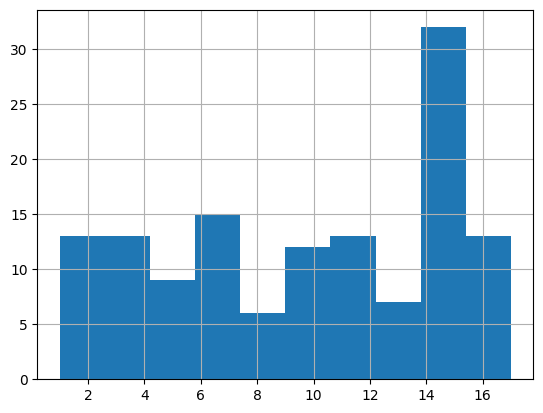

In [34]:
df_most_runs["Mat"].hist();

#PLOTTING HISTOGRAM OF AVERAGE OF PLAYERS

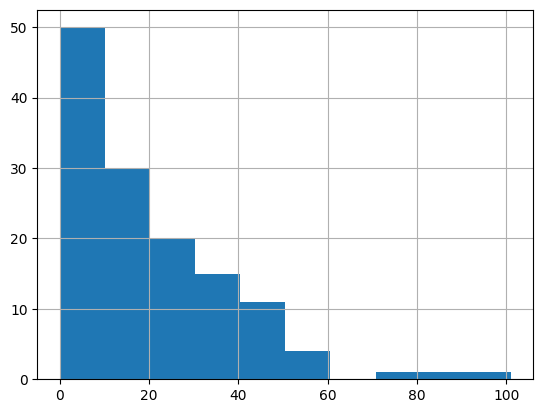

In [35]:
df_most_runs["Avg"].hist();

#PLOTTING HISTOGRAM OF BALLS FACED BY PLAYERS

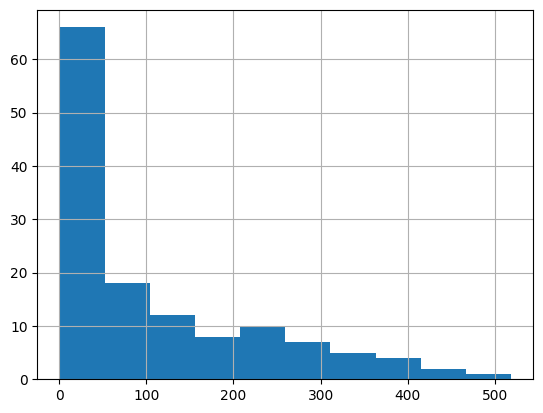

In [36]:
df_most_runs["BF"].hist();

#TOP 30 PLAYERS WITH MOST RUNS INA SEASON VS MATCHES PLAYED

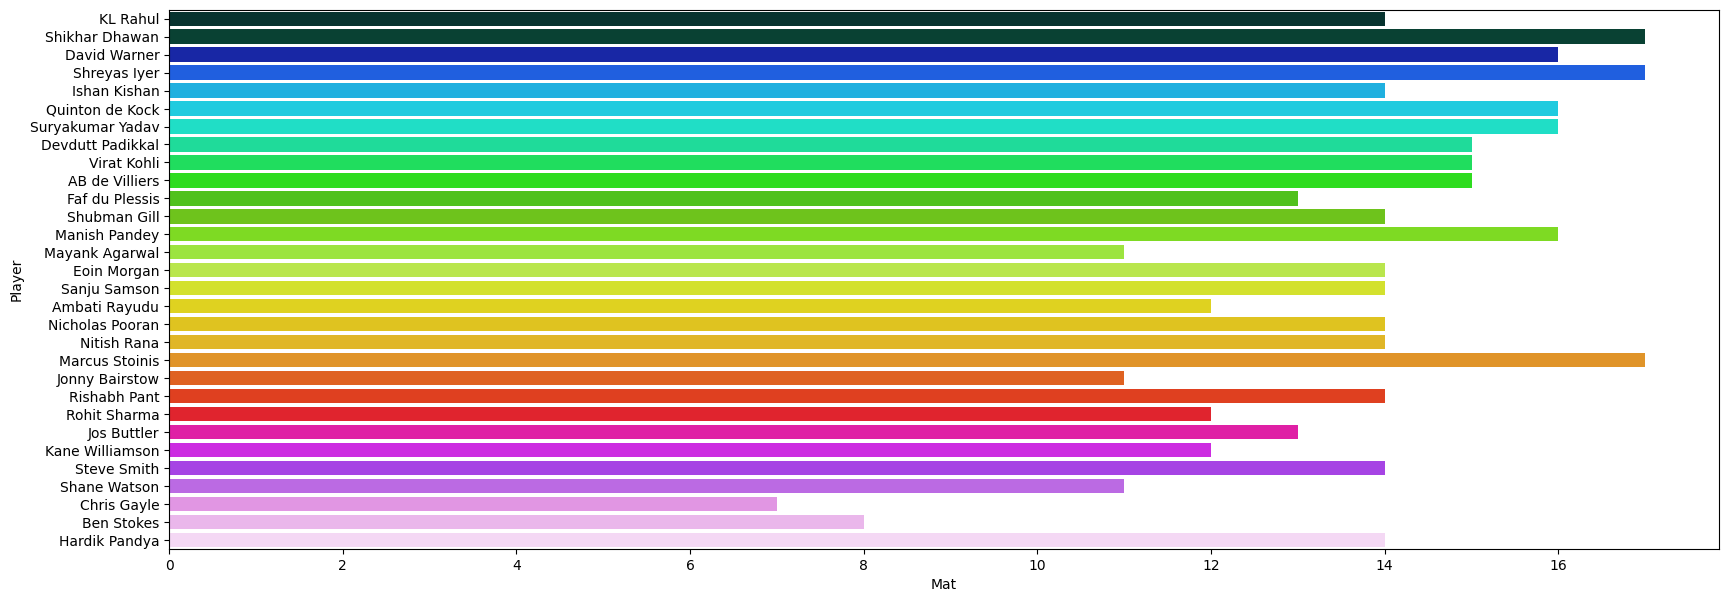

In [37]:
df_most_runs_sort_by_matches = df_most_runs.sort_values(by = ['Mat'], ascending = False)
plt.figure(figsize = (20, 7))
sns.barplot(x = df_most_runs["Mat"], y = df_most_runs["Player"][:30], palette = "gist_ncar");

#CHEACKING WHAT IS THE REALTION BETWEEN AVERAGE OF A PLAYER AND MATCHES PLAYED

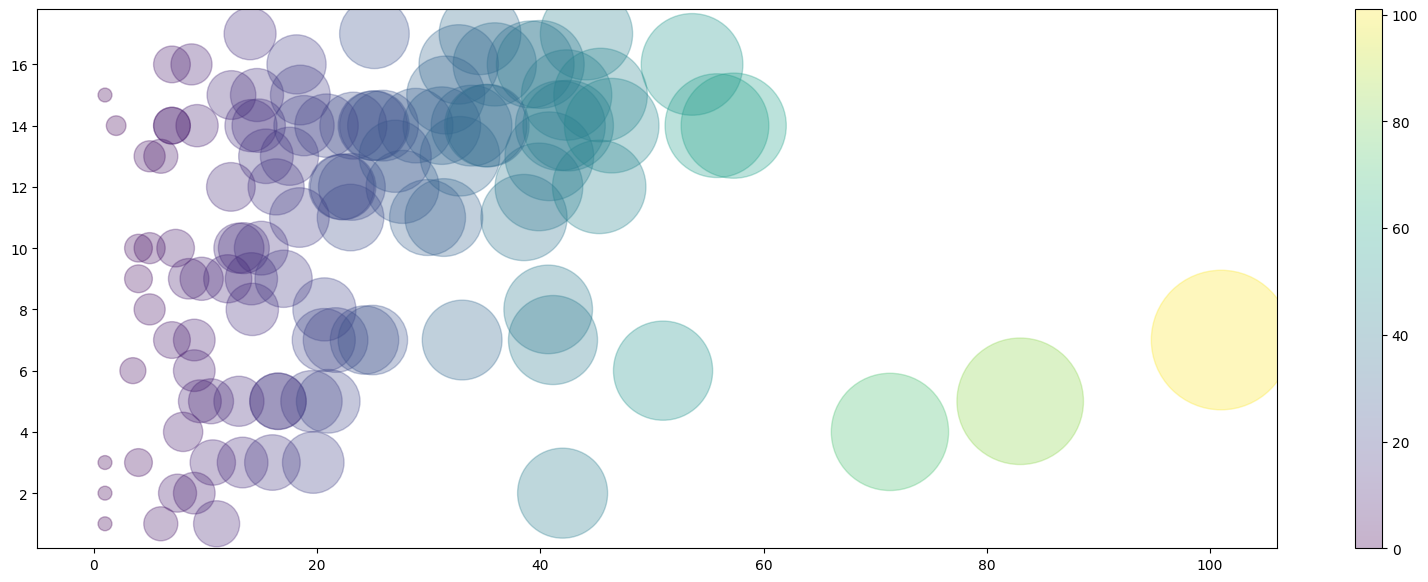

In [38]:
x = df_most_runs["Avg"]
y = df_most_runs["Mat"]
colors = df_most_runs["Avg"]
sizes = 100 * df_most_runs["Avg"]

plt.figure(figsize = (20, 7))
plt.scatter(x,
            y,
            c = colors,
            s = sizes,
            alpha = 0.3,
            cmap = 'viridis')
plt.colorbar();